## Luca Ambrosio Homework 1


We load the RealEstate.csv dataset and import the pandas library and other useful libraries

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

load the dataset

In [2]:
dataset = pd.read_csv("RealEstate.csv")

How many features are therein the dataset? Which is the target value?

We have eight features and the target value is the sale price of the property

In [3]:
dataset.shape

(781, 8)

In [4]:
dataset.head(15)

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale
5,136431,Oceano,324900,3,3,1800,180.50,Short Sale
6,137036,Santa Maria-Orcutt,192900,4,2,1603,120.34,Short Sale
7,137090,Santa Maria-Orcutt,215000,3,2,1450,148.28,Short Sale
8,137159,Morro Bay,999000,4,3,3360,297.32,Short Sale
9,137570,Atascadero,319000,3,2,1323,241.12,Short Sale


Explore the data and identify the datatype of each column.

To do this we use the dtypes command which allows us to have a description of what are the type of the dataset columns


In [5]:
dataset.dtypes

MLS              int64
Location        object
Price            int64
Bedrooms         int64
Bathrooms        int64
Size             int64
Price/SQ.Ft    float64
Status          object
dtype: object

Per each column, show the statistics of its values (value distribution, min, max, mean,
mode, percentiles, ...)


To display column statistics, use the describe command for numeric attributes and specify include = 'all' to also include categorical columns

In [6]:
dataset.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


In [7]:
dataset.describe(include='all') #includes also the cathegorical values

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
count,781.000000,781,7.810000e+02,781.000000,781.000000,781.000000,781.000000,781
unique,NaN,54,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Santa Maria-Orcutt,NaN,NaN,NaN,NaN,NaN,Short Sale
freq,NaN,265,NaN,NaN,NaN,NaN,NaN,516
mean,151224.550576,NaN,3.833291e+05,3.142125,2.355954,1755.058899,213.131293,NaN
std,3936.122042,NaN,3.490381e+05,0.855768,0.846596,819.577603,115.082146,NaN
min,132842.000000,NaN,2.650000e+04,0.000000,1.000000,120.000000,19.330000,NaN
25%,149922.000000,NaN,1.990000e+05,3.000000,2.000000,1218.000000,142.140000,NaN
50%,152581.000000,NaN,2.950000e+05,3.000000,2.000000,1550.000000,188.360000,NaN
75%,154167.000000,NaN,4.290000e+05,4.000000,3.000000,2032.000000,245.420000,NaN


Are there any missing values? If yes, handle them

No missing values

In [8]:
dataset.isnull().sum()


MLS            0
Location       0
Price          0
Bedrooms       0
Bathrooms      0
Size           0
Price/SQ.Ft    0
Status         0
dtype: int64

Is there any outlier? If yes, what can we say about them


Yes we have autlier and in this specific case we can justify them from the fact that the marked real estate that we are considering has characteristics for real estate very different and this is due to the market and not to the data

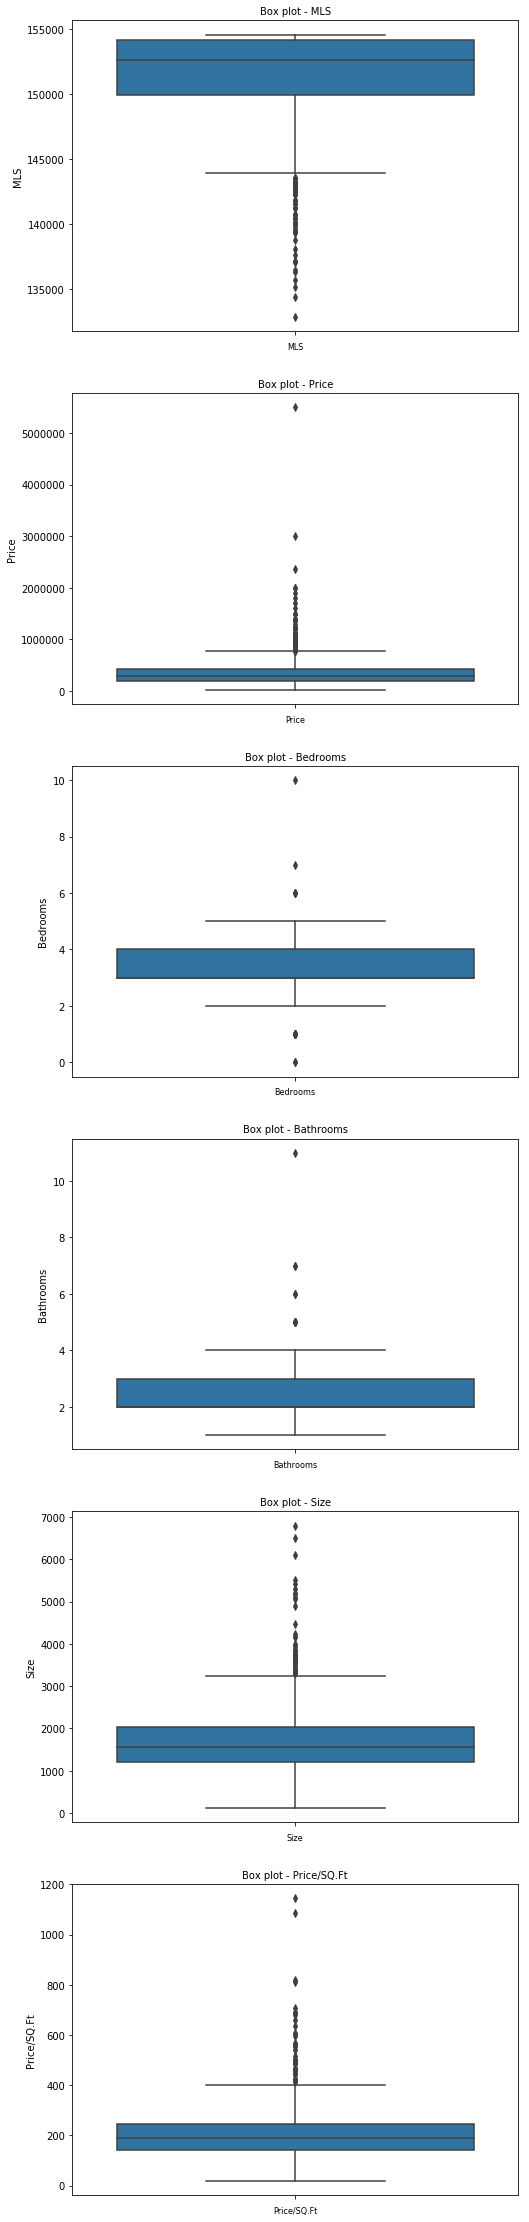

In [9]:

col_names=['MLS','Price','Bedrooms','Bathrooms','Size','Price/SQ.Ft']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    
    sns.boxplot(y=dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Are the values ranges comparable? Can we do anything about it?



For numerical attributes we need to normalize the columns and as far as categorical attributes are concerned we must transform them into numbers to be able to be compared to the values of the other columns

In [10]:
print('Location')
print(dataset['Location'].value_counts())
print('-----------------------------')
print('Staus')
print(dataset['Status'].value_counts())


Location
Santa Maria-Orcutt     265
Paso Robles             85
Atascadero              58
Nipomo                  34
Arroyo Grande           28
Lompoc                  26
Los Osos                21
Grover Beach            20
 Paso Robles            15
San Miguel              14
San Luis Obispo         14
 Santa Maria-Orcutt     13
Morro Bay               13
 Arroyo Grande          12
 Cambria                12
Pismo Beach             12
Buellton                12
Templeton               11
Oceano                  10
 Atascadero             10
Cambria                  9
Solvang                  8
 Pismo Beach             8
Coalinga                 7
 Los Osos                6
Santa Ynez               5
Guadalupe                4
 Morro Bay               4
Out Of Area              3
Bradley                  3
 San Luis Obispo         3
Avila Beach              3
King City                3
 Nipomo                  3
Los Alamos               3
Soledad                  3
 Solvang           

In [11]:

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["Location"] = lb_make.fit_transform(dataset["Location"])
dataset["Status"] = lb_make.fit_transform(dataset["Status"])
dataset.head(20)


,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,20,795000,3,3,2371,335.30,2
1,134364,43,399000,4,3,2818,141.59,2
2,135141,43,545000,4,3,3032,179.75,2
3,135712,38,909000,4,4,3540,256.78,2
4,136282,49,109900,3,1,1249,87.99,2
5,136431,41,324900,3,3,1800,180.50,2
6,137036,49,192900,4,2,1603,120.34,2
7,137090,49,215000,3,2,1450,148.28,2
8,137159,38,999000,4,3,3360,297.32,2
9,137570,21,319000,3,2,1323,241.12,2


In [12]:
#Data standardization
from sklearn.preprocessing import StandardScaler

X_HR = dataset[dataset.columns.difference(['Price'])] #characteristics
y_HR = dataset['Price'] #target

X_HR = StandardScaler().fit_transform(X_HR)
print(X_HR)

[[ 0.76123572 -0.16618591 -1.1568602  ...  1.06225856  0.75201641
   0.67162777]
 [ 0.76123572  1.00310417  0.43675021 ... -0.62205251  1.29776882
   0.67162777]
 [ 0.76123572  1.00310417  0.43675021 ... -0.2902508   1.55904625
   0.67162777]
 ...
 [-0.42072272 -0.16618591  0.57532503 ...  1.07669229 -0.79489253
  -1.7852401 ]
 [-0.42072272 -0.16618591 -2.54260839 ...  0.73993441  0.26853106
  -0.55680616]
 [ 0.76123572 -0.16618591 -2.33474616 ...  2.1453964   0.77765579
  -0.55680616]]


C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


8. Are the features correlated among them? (Visualize both the scatter plots and the correlation matrix)

Text(0.5, 1.0, 'Correlation of all employees')

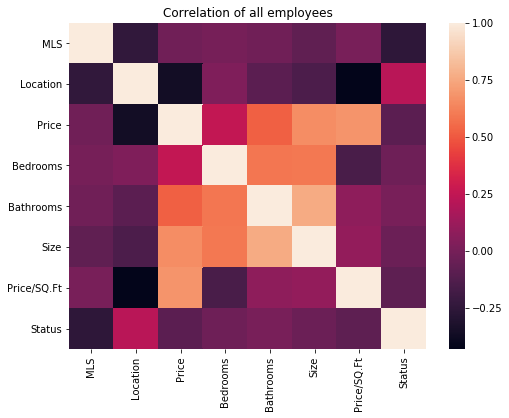

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values).set_title('Correlation of all employees')

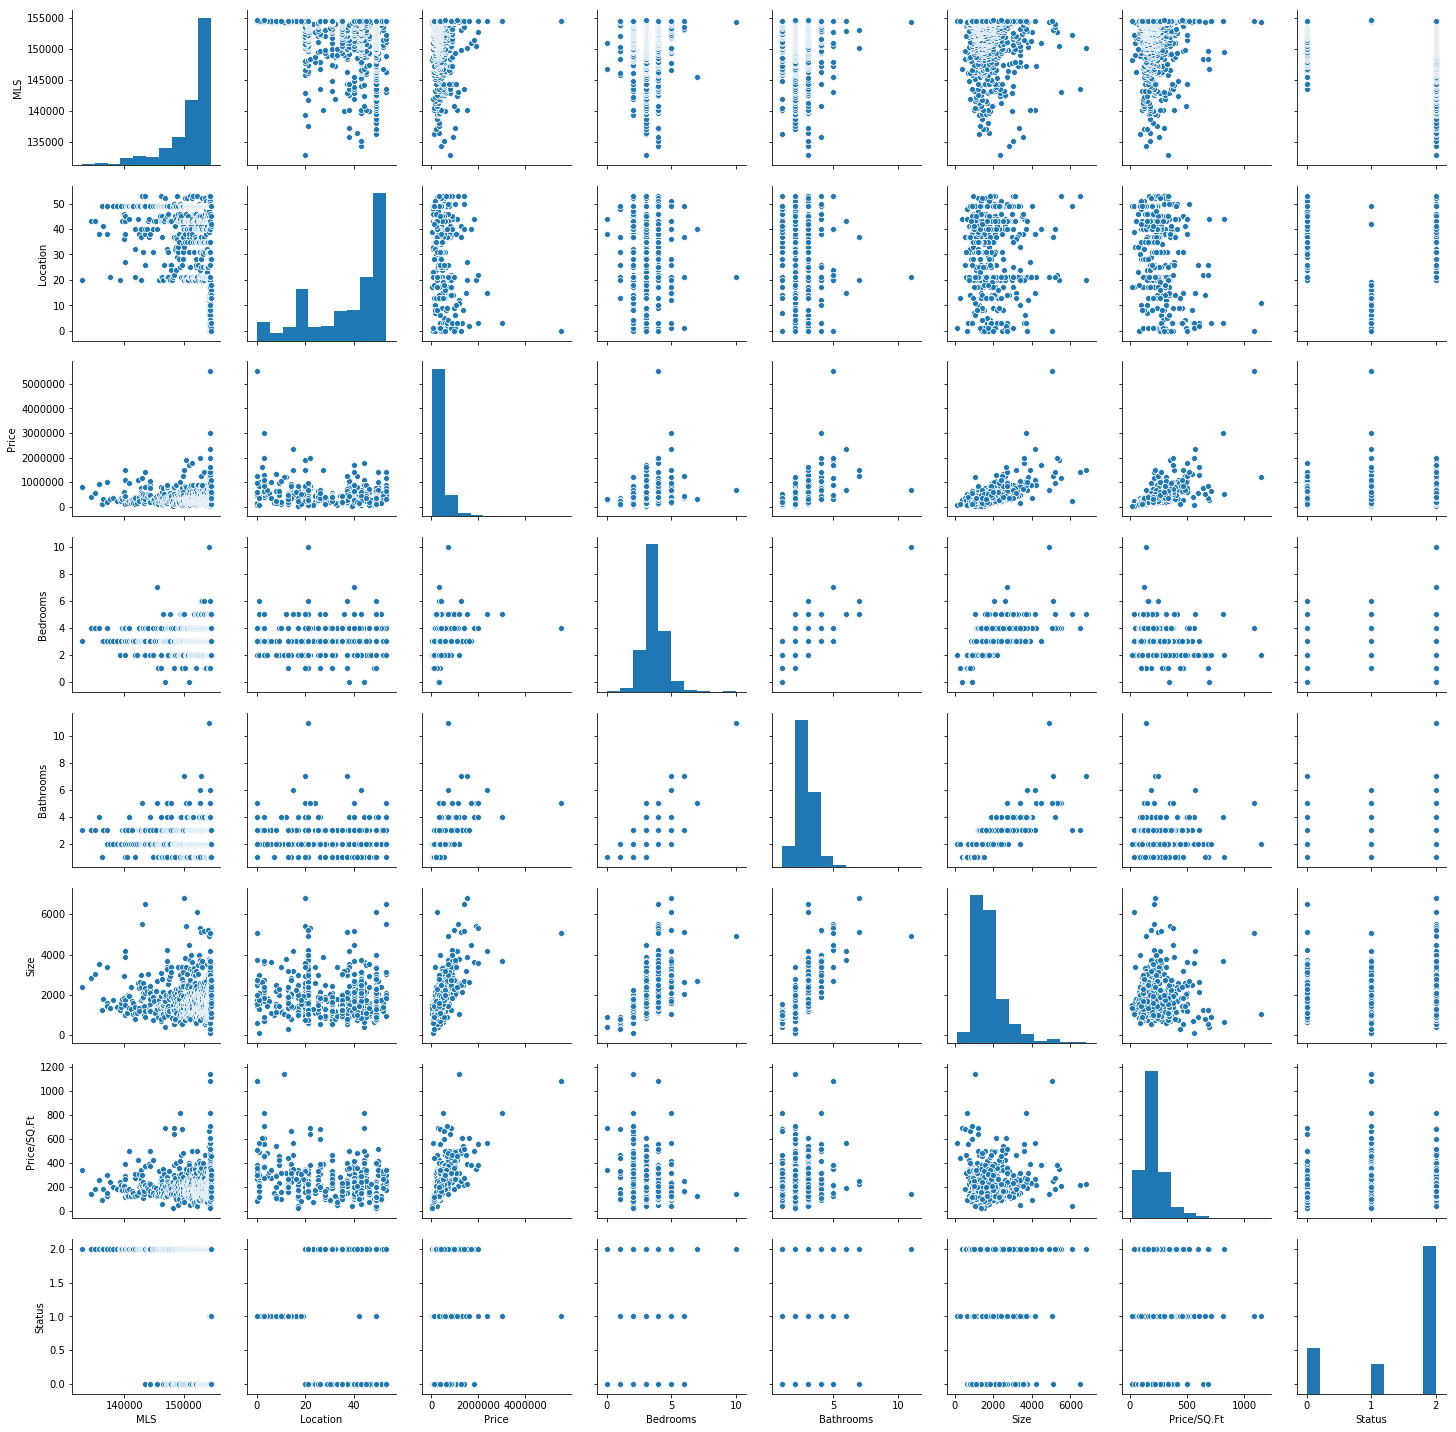

In [14]:
sns.pairplot(dataset)

Are the features correlated to the target value.

In [15]:
# find correlations to target
corr_matrix = dataset.corr().abs()
print(corr_matrix['Price'].sort_values(ascending=False))

Price          1.000000
Price/SQ.Ft    0.682803
Size           0.664724
Bathrooms      0.520110
Location       0.359046
Bedrooms       0.253162
Status         0.090364
MLS            0.017035
Name: Price, dtype: float64


10. Does it make sense to reduce the dimensionality of the feature space? If yes, which are the most relevant features, considering "Price/SQ.Ft" as target value?


it makes sense to reduce the dimensionality of the problem as it trains a model with features unrelated to our target variable.
I would consider the variables Price and Location

In [16]:
corr_matrix['Price/SQ.Ft'].abs().sort_values(ascending=False)

Price/SQ.Ft    1.000000
Price          0.682803
Location       0.430369
Bedrooms       0.153387
Size           0.098421
Status         0.081233
Bathrooms      0.079633
MLS            0.010860
Name: Price/SQ.Ft, dtype: float64

11. MODEL 1​. Let's call the target values ​y​. Take into account only the first most relevant
feature and call it ​X1​. Train a Simple Linear Regression model able to predict the
value target y given X1. Use 80% of the data for training, and 20% for testing the
model

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, train_size=0.8, random_state=200)

print('TRAIN')
print(train)
print('-------------------------------------------')
print('TEST')
print(test)

TRAIN
        MLS  Location    Price  Bedrooms  Bathrooms  Size  Price/SQ.Ft  Status
166  149482        49   242500         3          2  1218       199.10       0
245  150879        37   729000         3          2  1844       395.34       2
645  154367         6   999000         3          3  3621       275.89       1
693  154435         3   598000         2          3  2219       269.49       1
33   141737        21   389000         3          2  1415       274.91       2
455  153095        31   249500         2          2  1088       229.32       2
538  153866        46   720000         4          4  3531       203.91       0
334  152003        40   139500         2          2  1248       111.78       0
546  153939        35   191330         4          2  1237       154.67       0
628  154345        10   175000         2          2  1152       151.91       1
646  154370         0   599000         3          2  1570       381.53       1
768  154553        49    99000         2      

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
from sklearn.linear_model import LinearRegression
sqft_model = LinearRegression()
y = train['Price']
X1 = train['Price/SQ.Ft']
sqft_model.fit(pd.DataFrame(X1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
X_test = test['Price/SQ.Ft']
y_test = test['Price']
prediction = sqft_model.predict(pd.DataFrame(X_test))

12. Plot on the same graph the scatter plot of the data X1-y, and the Least Square
trained fitting line. For this line show the parameters m='slope' and q='intercept'.

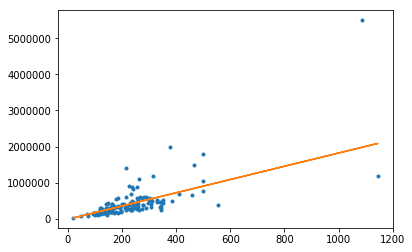

In [20]:
plt.figure()
plt.plot(X_test, y_test, '.', X_test, prediction, '-')
plt.show()

In [21]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(X1,y)
print("Slope = {}".format(slope))
print("Intercept = {}".format(intercept))
print("R-square = {}".format(r_value**2))
print("P-value = {}".format(p_value))
print("Standard error = {}".format(std_err))

Slope = 1833.1827343692764
Intercept = -11750.460834063007
R-square = 0.44574555969374663
P-value = 9.397686579780364e-82
Standard error = 81.96371671100056


13. Which is the SST (Total Sum of Squares)? Which is the SSR (or SSE, Sum of Squared Residuals)? Which is the value of R-square, and what does it mean?

In [22]:
y_test_mean = y_test.mean()
n = len(y_test)

SST = np.sum((y_test - y_test_mean) ** 2) / n
print("SST = {}".format(SST))

SSE =  np.sum((y_test - prediction) ** 2) / n
print("SEE = {}".format(SSE))

R_square = 1 - (SSE / SST)
print("R-square = {}".format(R_square))
print("It measures the fraction of the variance of the dependent variable expressed by the regression.")

SST = 254863811665.3008
SEE = 133532848546.41971
R-square = 0.4760619498158438
It measures the fraction of the variance of the dependent variable expressed by the regression.


14. MODEL 2​. Let's call the target values ​y​. Take into account the two most relevant
features and call them <​X1, X2>​. Train a Linear Regression model able to predict the
value target y given <X1, X2>. Use 80% of the data for training, and 20% for testing
the model

In [23]:
train, test = train_test_split(dataset, train_size=0.8, random_state=200)

print('TRAIN')
print(train)
print('-------------------------------------------')
print('TEST')
print(test)
sqft_model = LinearRegression()
y = train['Price']
X1 = train[['Price/SQ.Ft','Size']]
sqft_model.fit(pd.DataFrame(X1), y)
x_test = test[['Price/SQ.Ft','Size']]
y_test = test['Price']
prediction = sqft_model.predict(pd.DataFrame(x_test))

TRAIN
        MLS  Location    Price  Bedrooms  Bathrooms  Size  Price/SQ.Ft  Status
166  149482        49   242500         3          2  1218       199.10       0
245  150879        37   729000         3          2  1844       395.34       2
645  154367         6   999000         3          3  3621       275.89       1
693  154435         3   598000         2          3  2219       269.49       1
33   141737        21   389000         3          2  1415       274.91       2
455  153095        31   249500         2          2  1088       229.32       2
538  153866        46   720000         4          4  3531       203.91       0
334  152003        40   139500         2          2  1248       111.78       0
546  153939        35   191330         4          2  1237       154.67       0
628  154345        10   175000         2          2  1152       151.91       1
646  154370         0   599000         3          2  1570       381.53       1
768  154553        49    99000         2      

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


15. Print the model coefficients ​W ​and the value of 'intercept'.

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X1['Price/SQ.Ft'], y)
print("W_1 = {}".format(slope))
slope, intercept, r_value, p_value, std_err = stats.linregress(X1['Size'], y)
print("W_2 = {}".format(slope))
print("Intercept = {}".format(intercept))

W_1 = 1833.1827343692764
W_2 = 251.52911492242072
Intercept = -65738.36024711432


16. Which is the SST (Total Sum of Squares)? Which is the SSR (or SSE, Sum of
Squared Residuals)? Which is the value of R-square, and what does it mean?

In [25]:
y_test_mean = y_test.mean()
n = len(y_test)

SST = np.sum((y_test - y_test_mean) ** 2) / n
print("SST = {}".format(SST))

SSE =  np.sum((y_test - prediction) ** 2) / n
print("SEE = {}".format(SSE))

R_square = 1 - (SSE / SST)
print("R-square = {}".format(R_square))
print("It measures the fraction of the variance of the dependent variable expressed by the regression.")

SST = 254863811665.3008
SEE = 60124246589.10989
R-square = 0.7640926493398448
It measures the fraction of the variance of the dependent variable expressed by the regression.


17. MODEL 3​. Let's call the target values ​y​. Take into account all the features vector
<​Xi>​. Train a Linear Regression model able to predict the value target y given the
vector <Xi>. Use 80% of the data for training, and 20% for testing the model.

In [26]:
train, test = train_test_split(dataset, train_size=0.8, random_state=200)
col_names=dataset.columns
print('TRAIN')
print(train)
print('-------------------------------------------')
print('TEST')
print(test)
sqft_model = LinearRegression()
y = train['Price']
X1 = train[['Price/SQ.Ft', 'Size', 'Status', 'Bathrooms', 'Bedrooms', 'Location', 'MLS']]
sqft_model.fit(pd.DataFrame(X1), y)
x_test = test[['Price/SQ.Ft', 'Size', 'Status', 'Bathrooms', 'Bedrooms', 'Location', 'MLS']]
y_test = test['Price']
prediction = sqft_model.predict(pd.DataFrame(x_test))

TRAIN
        MLS  Location    Price  Bedrooms  Bathrooms  Size  Price/SQ.Ft  Status
166  149482        49   242500         3          2  1218       199.10       0
245  150879        37   729000         3          2  1844       395.34       2
645  154367         6   999000         3          3  3621       275.89       1
693  154435         3   598000         2          3  2219       269.49       1
33   141737        21   389000         3          2  1415       274.91       2
455  153095        31   249500         2          2  1088       229.32       2
538  153866        46   720000         4          4  3531       203.91       0
334  152003        40   139500         2          2  1248       111.78       0
546  153939        35   191330         4          2  1237       154.67       0
628  154345        10   175000         2          2  1152       151.91       1
646  154370         0   599000         3          2  1570       381.53       1
768  154553        49    99000         2      

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


18. Print the model coefficients ​W ​and the value of 'intercept'.

In [27]:
for i, col_val in enumerate(col_names):
    if col_val != 'Price':
        slope, intercept, r_value, p_value, std_err = stats.linregress(X1[col_val], y)
        print("W_{} = {}".format(i, slope))
print("Intercept = {}".format(intercept))

W_0 = -1.810600109456542
W_1 = -7886.678516180043
W_3 = 94507.77620483539
W_4 = 187569.28603300123
W_5 = 251.52911492242072
W_6 = 1833.1827343692764
W_7 = -29605.597643521694
Intercept = 417875.5628945173


19. Which is the SST (Total Sum of Squares)? Which is the SSR (or SSE, Sum of
Squared Residuals)? Which is the value of R-square, and what does it mean?

In [28]:
y_test_mean = y_test.mean()
n = len(y_test)

SST = np.sum((y_test - y_test_mean) ** 2) / n
print("SST = {}".format(SST))

SSE =  np.sum((y_test - prediction) ** 2) / n
print("SEE = {}".format(SSE))

R_square = 1 - (SSE / SST)
print("R-square = {}".format(R_square))
print("It measures the fraction of the variance of the dependent variable expressed by the regression.")

SST = 254863811665.3008
SEE = 60529131551.43001
R-square = 0.7625040167298458
It measures the fraction of the variance of the dependent variable expressed by the regression.
